In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

In [6]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


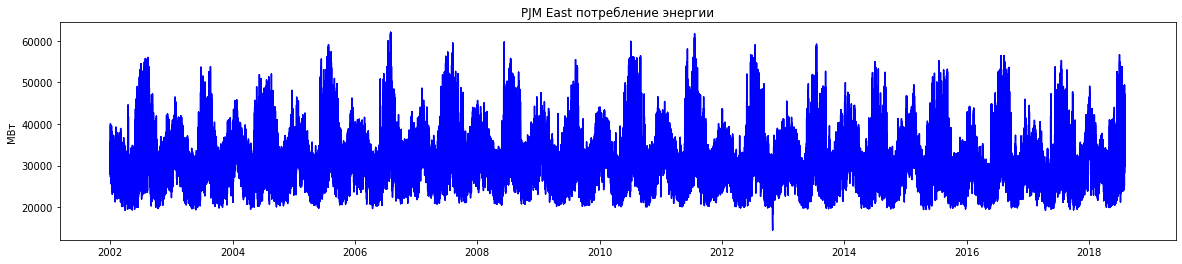

In [4]:

plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [8]:
d_data=data.resample('D').mean()

Text(0.5, 1.0, 'PJME_MW')

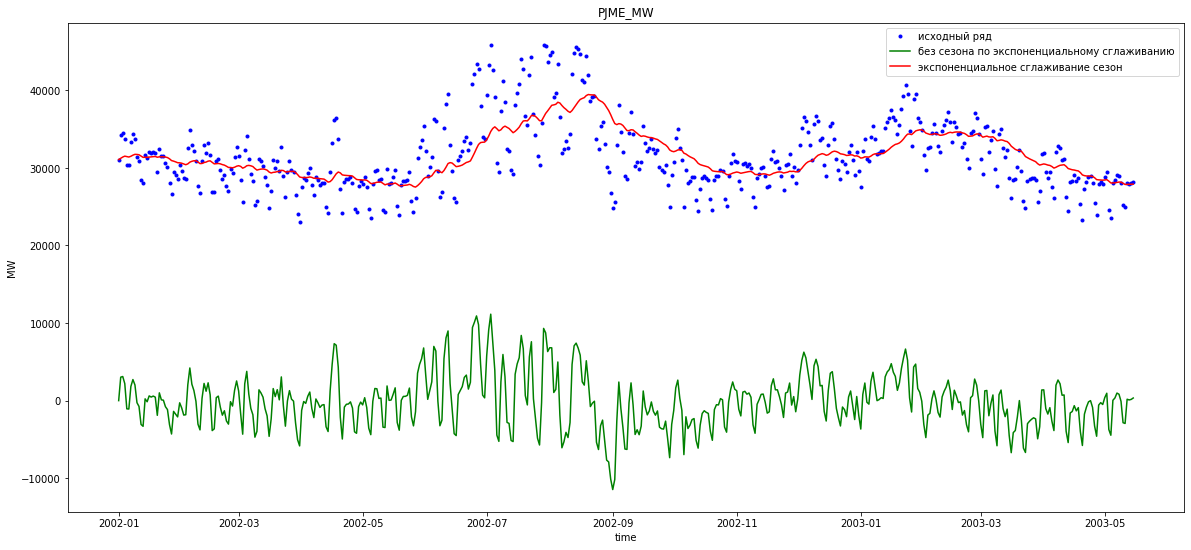

In [9]:

data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [39]:
e_data_exp_1 = pd.DataFrame(data = data_exp_1, index = d_data.index)

In [40]:
df= pd.DataFrame(e_data_exp_1)
df.head()

,0
Date,
2002-01-01,31080.739130
2002-01-02,31239.779257
2002-01-03,31403.384044
2002-01-04,31518.987759
2002-01-05,31463.294621


In [41]:

 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0.0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0.0
df.iloc[10:,2]=df.iloc[:-10,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)

df.head(15)

,0,t,t1,exp_0_01,exp_0_03,exp_0_08
Date,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,31080.739130,31080.739130,31080.739130
2002-01-02,31239.779257,31080.739130,0.000000,31082.329532,31085.510334,31093.462341
2002-01-03,31403.384044,31239.779257,0.000000,31085.540077,31095.046546,31118.256077
2002-01-04,31518.987759,31403.384044,0.000000,31089.874554,31107.764782,31150.314611
2002-01-05,31463.294621,31518.987759,0.000000,31093.608754,31118.430677,31175.353012
2002-01-06,31406.309057,31463.294621,0.000000,31096.735757,31127.067028,31193.829496
2002-01-07,31502.685270,31406.309057,0.000000,31100.795252,31138.335576,31218.537958
2002-01-08,31645.696840,31502.685270,0.000000,31106.244268,31153.556414,31252.710668
2002-01-09,31752.220331,31645.696840,0.000000,31112.704029,31171.516331,31292.671441


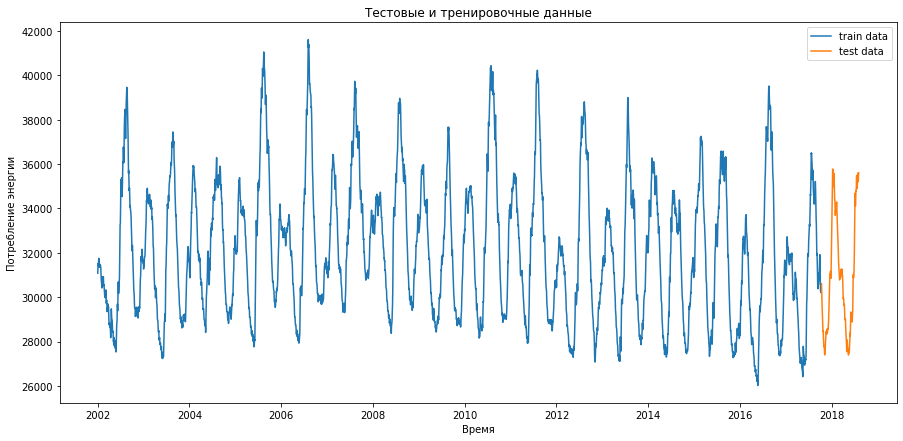

In [53]:
# сделаем примеры и модель для 1
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_e, test_e = split_data_b( df, '10-10-2017')

X_train_e = train_e.iloc[:-1,:]
y_train_e = train_e[df.columns[0]].values[1:]
X_test_e = test_e.iloc[:-1,:]
y_test_e = test_e[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train_e.index.get_level_values('Date'),train_e[df.columns[0]], label='train data' )
plt.plot(test_e.index.get_level_values('Date'),test_e[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

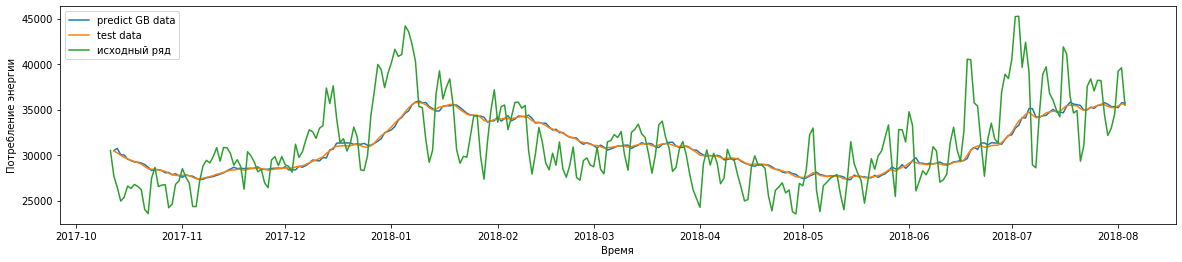

ошибка градиентного бустинга :   0.4536657445873299 %


In [50]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_e, y_train_e ) 
X_test_pred_gb = model_gb.predict(X_test_e)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_e.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_e.index[1:],y_test_e, label='test data')
plt.plot(d_data.loc['2017-10-11':].index, d_data.loc['2017-10-11':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_e, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

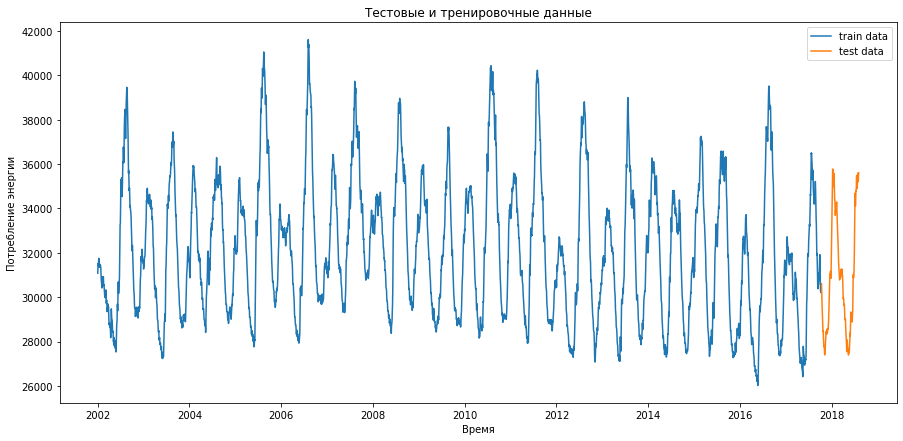

In [54]:
# сделаем примеры и модель для 10
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_e, test_e = split_data_b( df, '10-10-2017')

X_train_e = train_e.iloc[:-10,:]
y_train_e = train_e[df.columns[0]].values[10:]
X_test_e = test_e.iloc[:-10,:]
y_test_e = test_e[df.columns[0]].values[10:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train_e.index.get_level_values('Date'),train_e[df.columns[0]], label='train data' )
plt.plot(test_e.index.get_level_values('Date'),test_e[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

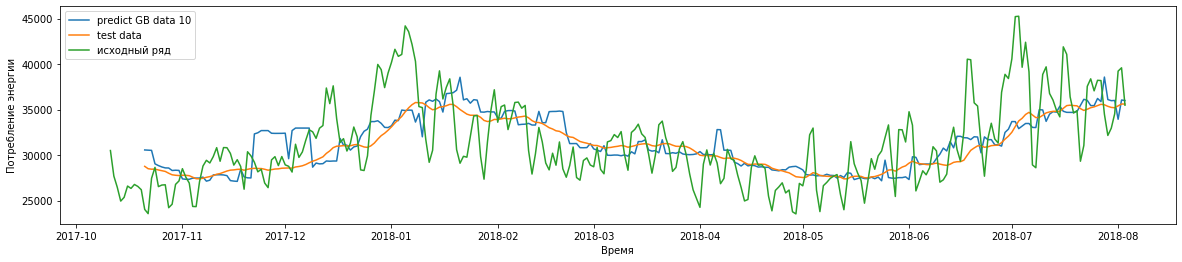

ошибка градиентного бустинга для 10:   3.1310901414556023 %


In [58]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_e, y_train_e ) 
X_test_pred_gb = model_gb.predict(X_test_e)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_e.index[10:],X_test_pred_gb, label='predict GB data 10' )
plt.plot(test_e.index[10:],y_test_e, label='test data')
plt.plot(d_data.loc['2017-10-11':].index, d_data.loc['2017-10-11':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_e, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга для 10:  ', er_g, '%')

### Выводы

Чем больше глубина, тем больше ошибка.